In [151]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
# import json
from pylab import figure
import ast
import os
import pandas as pd
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from dtw import dtw
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [152]:
def load_dataframe(filepath):
    data = pd.read_csv(filepath, sep=", ", header=None)
    data[0] = data[0].apply(lambda x: x.replace("[(", ""))
    data[2] = data[2].apply(lambda x: x.replace(")", ""))
    data[3] = data[3].apply(lambda x: x.replace("(", ""))
    data[5] = data[5].apply(lambda x: x.replace(")]", ""))
    for i in range(len(data.columns)):
        data[i] = data[i].apply(lambda x: int(x))
    data.columns = ['accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ']
    return data 

In [3]:
def get_avg_from_dataframes(dataframe_lsts):
    dfs = dataframe_lsts
    averages = pd.concat([each.stack() for each in dfs],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
    return averages

In [153]:
def gesture_overall_dataframe(root_dir):
    dataframes = []
    for fname in os.listdir(root_dir):
        if fname == '.DS_Store':
            continue
        filepath = os.path.join(root_dir, fname)
        dataframes.append(load_dataframe(filepath))
    bite_avg = get_avg_from_dataframes(dataframes)
    return bite_avg

In [143]:
def create_single_row_df(df):
    df1=df.stack().swaplevel()
    df1.index=df1.index.map('{0[0]}_{0[1]}'.format) 
    df_new = df1.to_frame().T
    return df_new

In [154]:
bite = gesture_overall_dataframe("Sensor_Data_For_Bite_using_Accelerometer")
bite_new = gesture_overall_dataframe("Sensor_Data_For_BiteNew_using_Accelerometer")
left_bite = gesture_overall_dataframe("Sensor_Data_For_LeftBite_using_Accelerometer")
left_bite_new = gesture_overall_dataframe("Sensor_Data_For_LeftBite_new_using_Accelerometer")
right_bite = gesture_overall_dataframe("Sensor_Data_For_RightBite_Using_Accelerometer")
right_bite_new = gesture_overall_dataframe("Sensor_Data_For_RightBite_new_Using_Accelerometer")
front_bite = gesture_overall_dataframe("Sensor_Data_For_Front_Bite_using_Accelerometer")
front_bite_new = gesture_overall_dataframe("Sensor_Data_For_Frontbite_New_Using_Accelerometer")
still = gesture_overall_dataframe("Sensor_Data_For_Still_posA_using_Accelerometer")
still_new = gesture_overall_dataframe("Sensor_Data_For_Still_PosB_using_Accelerometer")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [155]:
bite

,accX,accY,accZ,gyrX,gyrY,gyrZ
0,-14809.916667,3457.083333,-6011.083333,-377.916667,573.250000,345.833333
1,-14785.166667,3505.166667,-6030.666667,-347.083333,551.916667,319.916667
2,-14769.000000,3543.750000,-6042.250000,-337.250000,551.916667,308.000000
3,-14765.833333,3552.583333,-6046.083333,-333.083333,548.333333,299.333333
4,-14761.000000,3570.583333,-6056.583333,-334.416667,550.250000,328.416667
5,-14758.166667,3578.750000,-6067.000000,-338.916667,548.416667,331.083333
6,-14752.416667,3587.000000,-6068.666667,-334.166667,543.750000,326.833333
7,-14753.083333,3601.583333,-6074.916667,-323.333333,531.750000,322.750000
8,-14749.250000,3612.000000,-6074.916667,-322.833333,519.000000,307.750000
9,-14741.916667,3654.500000,-6090.833333,-317.416667,507.500000,311.333333


In [144]:
bite_row = create_single_row_df(bite)
bite_row

,accX_0,accY_0,accZ_0,gyrX_0,gyrY_0,gyrZ_0,accX_1,accY_1,accZ_1,gyrX_1,...,accZ_151,gyrX_151,gyrY_151,gyrZ_151,accX_152,accY_152,accZ_152,gyrX_152,gyrY_152,gyrZ_152
0,-14809.916667,3457.083333,-6011.083333,-377.916667,573.25,-6011.083333,-14785.166667,3505.166667,-6030.666667,-347.083333,...,-5999.0,-243.0,135.0,-5999.0,-14822.0,3585.0,-5999.0,-243.0,135.0,-5999.0


In [111]:
bite_row.shape

(1, 918)

In [149]:
b = pd.DataFrame(bite_row.values.reshape(153,-1),
                      index=bite_row.index.repeat(153))


In [130]:
b = b[[0, 1, 2]].values

In [146]:
s = pd.DataFrame(still_row.values.reshape(216,-1),
                      index=still_row.index.repeat(216))
#s = s[[0, 1, 2]].values

In [64]:
bite_row_acc = bite_row.as_matrix(columns=None)
bite_row_acc

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-1.48099167e+04,  3.45708333e+03, -6.01108333e+03,
        -3.77916667e+02,  5.73250000e+02, -6.01108333e+03,
        -1.47851667e+04,  3.50516667e+03, -6.03066667e+03,
        -3.47083333e+02,  5.51916667e+02, -6.03066667e+03,
        -1.47690000e+04,  3.54375000e+03, -6.04225000e+03,
        -3.37250000e+02,  5.51916667e+02, -6.04225000e+03,
        -1.47658333e+04,  3.55258333e+03, -6.04608333e+03,
        -3.33083333e+02,  5.48333333e+02, -6.04608333e+03,
        -1.47610000e+04,  3.57058333e+03, -6.05658333e+03,
        -3.34416667e+02,  5.50250000e+02, -6.05658333e+03,
        -1.47581667e+04,  3.57875000e+03, -6.06700000e+03,
        -3.38916667e+02,  5.48416667e+02, -6.06700000e+03,
        -1.47524167e+04,  3.58700000e+03, -6.06866667e+03,
        -3.34166667e+02,  5.43750000e+02, -6.06866667e+03,
        -1.47530833e+04,  3.60158333e+03, -6.07491667e+03,
        -3.23333333e+02,  5.31750000e+02, -6.07491667e+03,
        -1.47492500e+04,  3.61200000e+03, -6.07491667e+0

In [126]:
still_row = create_single_row_df(still)
still_row

,accX_0,accY_0,accZ_0,gyrX_0,gyrY_0,gyrZ_0,accX_1,accY_1,accZ_1,gyrX_1,...,accZ_214,gyrX_214,gyrY_214,gyrZ_214,accX_215,accY_215,accZ_215,gyrX_215,gyrY_215,gyrZ_215
0,-15183.545455,1730.909091,-5670.909091,-124.090909,183.363636,-5670.909091,-15189.909091,1744.454545,-5672.0,-149.818182,...,-4376.0,-965.0,413.0,-4376.0,-15361.0,-269.0,-4376.0,-965.0,413.0,-4376.0


In [150]:
dist, cost, acc, path = dtw(b.values, s.values, dist=lambda x, y: norm(x - y, ord=1))
dist

2375.617757227715

In [133]:
dist, cost, acc, path = dtw(left_bite.values, still.values, dist=lambda x, y: norm(x - y, ord=1))
dist

4270.7106414780255

In [157]:
def get_numpy_array_for_acclerometer(df):
    return df.as_matrix(columns=still.columns[:3])

In [158]:
def get_numpy_array_for_gyroscope(df):
    return df.as_matrix(columns=still.columns[4:])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


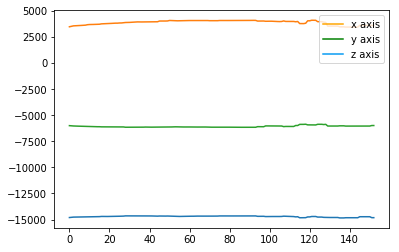

In [159]:
plot(get_numpy_array_for_acclerometer(bite))
bite_acc = get_numpy_array_for_acclerometer(bite)

x_axis = mlines.Line2D([], [], color='orange', marker='', linestyle='solid',
                          markersize=10, label='x axis')
y_axis = mlines.Line2D([], [], color='green', marker='', linestyle='solid',
                          markersize=10, label='y axis')
z_axis = mlines.Line2D([], [], color='xkcd:azure', marker='', linestyle='solid',
                          markersize=10, label='z axis')

plt.legend(handles=[x_axis, y_axis, z_axis], loc='best')

plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


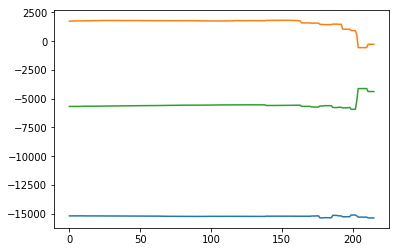

In [9]:
plot(get_numpy_array_for_acclerometer(still))
still_acc = get_numpy_array_for_acclerometer(still)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


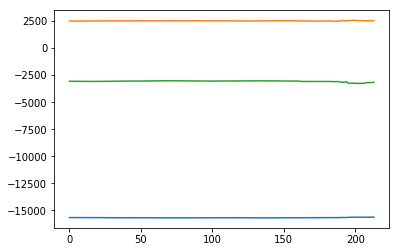

In [10]:
plot(get_numpy_array_for_acclerometer(still_new))
still_new_acc = get_numpy_array_for_acclerometer(still_new)

In [58]:
bite_acc

array([[-14809.91666667,   3457.08333333,  -6011.08333333],
       [-14785.16666667,   3505.16666667,  -6030.66666667],
       [-14769.        ,   3543.75      ,  -6042.25      ],
       [-14765.83333333,   3552.58333333,  -6046.08333333],
       [-14761.        ,   3570.58333333,  -6056.58333333],
       [-14758.16666667,   3578.75      ,  -6067.        ],
       [-14752.41666667,   3587.        ,  -6068.66666667],
       [-14753.08333333,   3601.58333333,  -6074.91666667],
       [-14749.25      ,   3612.        ,  -6074.91666667],
       [-14741.91666667,   3654.5       ,  -6090.83333333],
       [-14736.58333333,   3671.41666667,  -6100.        ],
       [-14736.58333333,   3671.41666667,  -6100.        ],
       [-14733.16666667,   3680.16666667,  -6103.91666667],
       [-14733.58333333,   3684.        ,  -6107.16666667],
       [-14728.5       ,   3692.91666667,  -6113.33333333],
       [-14722.66666667,   3700.83333333,  -6113.75      ],
       [-14704.33333333,   3736.16666667

In [11]:
dist, cost, acc, path = dtw(bite_acc, still_acc, dist=lambda x, y: norm(x - y, ord=1))

In [12]:
print('Minimum distance found between bite and still at Pos A is: ', dist)


Minimum distance found between bite and still at Pos A is:  1854.4439243382321


In [160]:
def dtw_gesture_and_still_acc(gesture_df, control_df, gesture_name="Gesture", pos='A'):
    acc = get_numpy_array_for_acclerometer(gesture_df)
    control_df = get_numpy_array_for_acclerometer(control_df)
    plot(acc)
    x_axis = mlines.Line2D([], [], color='orange', marker='', linestyle='solid',
                          markersize=10, label='x axis')
    y_axis = mlines.Line2D([], [], color='green', marker='', linestyle='solid',
                              markersize=10, label='y axis')
    z_axis = mlines.Line2D([], [], color='xkcd:azure', marker='', linestyle='solid',
                              markersize=10, label='z axis')

    plt.legend(handles=[x_axis, y_axis, z_axis])

    plt.show()
    dist, cost, acc, path = dtw(acc, control_df, dist=lambda x, y: norm(x - y, ord=1))
    print('Minimum distance found between {} and still at Pos {} is: '.format(gesture_name, pos), dist)

In [161]:
def dtw_gesture_and_still_gyr(gesture_df, control_df, gesture_name="Gesture", pos='A'):
    acc = get_numpy_array_for_gyroscope(gesture_df)
    control_df = get_numpy_array_for_gyroscope(control_df)
    plot(acc)
    x_axis = mlines.Line2D([], [], color='orange', marker='', linestyle='solid',
                          markersize=10, label='x axis')
    y_axis = mlines.Line2D([], [], color='green', marker='', linestyle='solid',
                              markersize=10, label='y axis')
    z_axis = mlines.Line2D([], [], color='xkcd:azure', marker='', linestyle='solid',
                              markersize=10, label='z axis')

    plt.legend(handles=[x_axis, y_axis, z_axis])

    plt.show()
    dist, cost, acc, path = dtw(acc, control_df, dist=lambda x, y: norm(x - y, ord=1))
    print('Minimum distance found between {} and still at Pos {} is: '.format(gesture_name, pos), dist)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


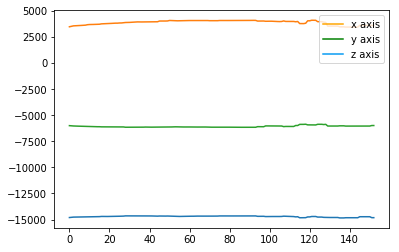

Minimum distance found between bite and still at Pos A is:  1854.4439243382321


In [156]:
dtw_gesture_and_still_acc(bite, still, 'bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


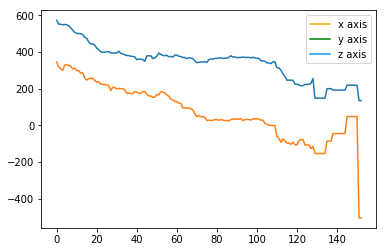

Minimum distance found between bite and still at Pos A is:  159.12131496928257


In [162]:
dtw_gesture_and_still_gyr(bite, still, 'bite', 'A')

In [165]:
dist, cost, acc, path = dtw(bite.values, still.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Bite and still at Pos A is: {}'.format(dist))

Minimum distance found between Bite and still at Pos A is: 2137.4871250249307


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


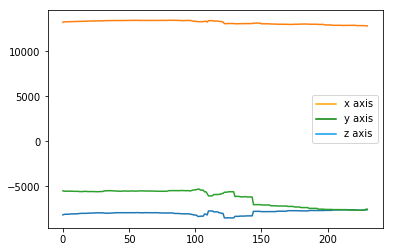

Minimum distance found between bite and still at Pos B is:  11239.8384765796


In [18]:
dtw_gesture_and_still_acc(bite_new, still_new, 'bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


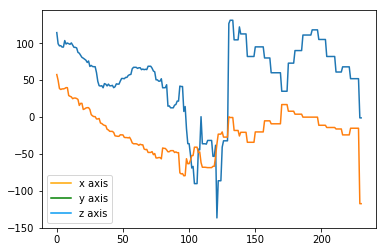

Minimum distance found between bite and still at Pos B is:  91.045822754025


In [163]:
dtw_gesture_and_still_gyr(bite_new, still_new, 'bite', 'B')

In [164]:
dist, cost, acc, path = dtw(bite_new.values, still_new.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Bite and still at Pos B is: {}'.format(dist))

Minimum distance found between Bite and still at Pos B is: 11384.750167404376


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


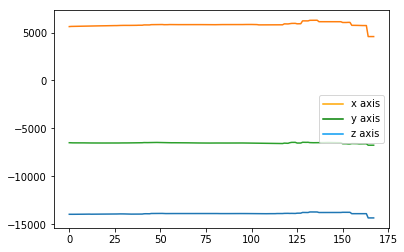

Minimum distance found between left_bite and still at Pos A is:  3510.3582557344284


In [19]:
dtw_gesture_and_still_acc(left_bite, still, 'left_bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


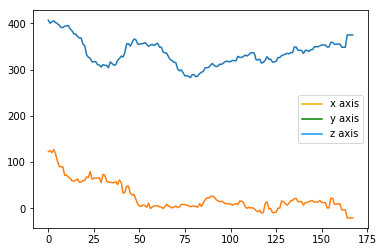

Minimum distance found between left_bite and still at Pos A is:  124.15196956544618


In [166]:
dtw_gesture_and_still_gyr(left_bite, still, 'left_bite', 'A')

In [170]:
dist, cost, acc, path = dtw(left_bite.values, still.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Left_Bite and still at Pos A is: {}'.format(dist))

Minimum distance found between Left_Bite and still at Pos A is: 3722.483425117996


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


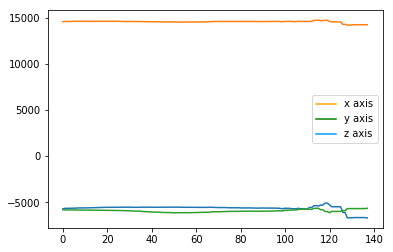

Minimum distance found between left_bite and still at Pos B is:  14792.32077655614


In [20]:
dtw_gesture_and_still_acc(left_bite_new, still_new, 'left_bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


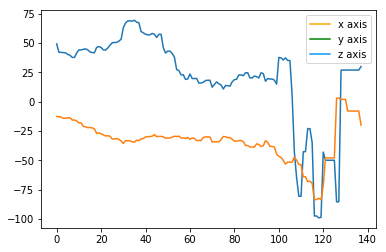

Minimum distance found between left_bite and still at Pos B is:  123.91478451315098


In [171]:
dtw_gesture_and_still_gyr(left_bite_new, still_new, 'left_bite', 'B')

In [172]:
dist, cost, acc, path = dtw(left_bite_new.values, still_new.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Left_Bite and still at Pos B is: {}'.format(dist))

Minimum distance found between Left_Bite and still at Pos B is: 14980.766486906394


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


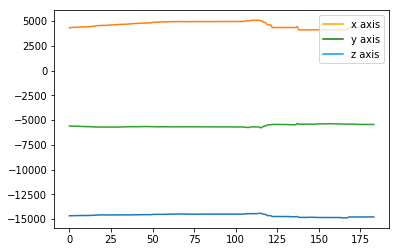

Minimum distance found between right_bite and still at Pos A is:  2004.2870533910527


In [21]:
dtw_gesture_and_still_acc(right_bite, still, 'right_bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


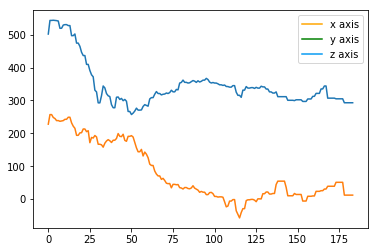

Minimum distance found between right_bite and still at Pos A is:  155.22743398268406


In [173]:
dtw_gesture_and_still_gyr(right_bite, still, 'right_bite', 'A')

In [174]:
dist, cost, acc, path = dtw(right_bite.values, still.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Right_Bite and still at Pos A is: {}'.format(dist))

Minimum distance found between Right_Bite and still at Pos A is: 2255.598871843434


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


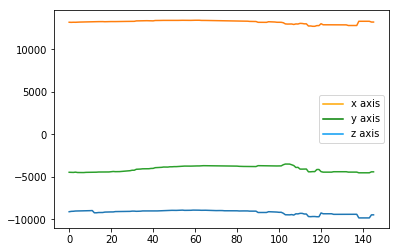

Minimum distance found between right_bite and still at Pos B is:  10593.0843892296


In [22]:
dtw_gesture_and_still_acc(right_bite_new, still_new, 'right_bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


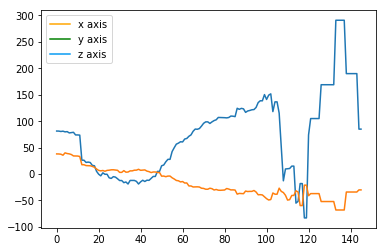

Minimum distance found between right_bite and still at Pos B is:  78.0038285634119


In [175]:
dtw_gesture_and_still_gyr(right_bite_new, still_new, 'right_bite', 'B')

In [176]:
dist, cost, acc, path = dtw(right_bite_new.values, still_new.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Right_Bite and still at Pos B is: {}'.format(dist))

Minimum distance found between Right_Bite and still at Pos B is: 10728.418945406447


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


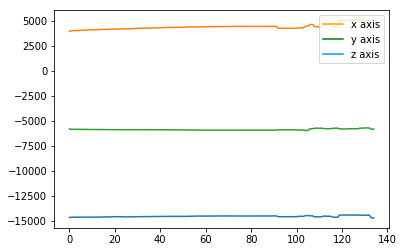

Minimum distance found between front_bite and still at Pos A is:  2217.3682924071804


In [23]:
dtw_gesture_and_still_acc(front_bite, still, 'front_bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


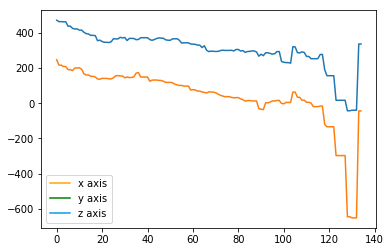

Minimum distance found between front_bite and still at Pos A is:  123.79699960533293


In [177]:
dtw_gesture_and_still_gyr(front_bite, still, 'front_bite', 'A')

In [178]:
dist, cost, acc, path = dtw(front_bite.values, still.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Front_Bite and still at Pos A is: {}'.format(dist))

Minimum distance found between Front_Bite and still at Pos A is: 2527.0691565636025


In [ ]:
dtw_gesture_and_still_acc(front_bite, still, 'front_bite', 'A')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


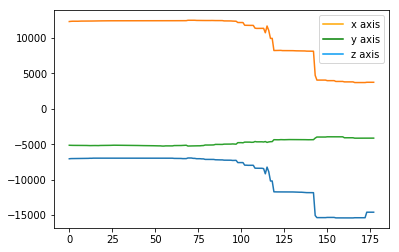

Minimum distance found between front_bite and still at Pos B is:  7264.556007781901


In [179]:
dtw_gesture_and_still_acc(front_bite_new, still_new, 'front_bite', 'B')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


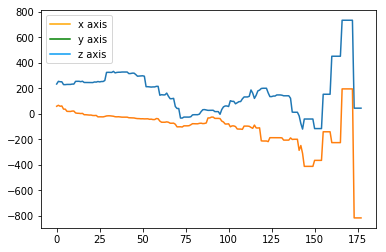

Minimum distance found between front_bite and still at Pos B is:  123.93688497585178


In [180]:
dtw_gesture_and_still_gyr(front_bite_new, still_new, 'front_bite', 'B')

In [181]:
dist, cost, acc, path = dtw(front_bite_new.values, still_new.values, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found between Front_Bite and still at Pos B is: {}'.format(dist))

Minimum distance found between Front_Bite and still at Pos B is: 7518.584333311245
